# Iris dataset in machine learning

Here we are trying to build a model that is able to predict the type of Iris that will be given to the model, according to 4 features which are physical features of the flower (sepal and petal). 

The model would help facilitate the recognition of any new flower, which would have been difficult by human sight. 

If the model is accurate, we will feed it a new flower (or rather it's sepal width, length, and petal width, length) and the model will predict the correct type of Iris.

The dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/iris).

You can find below the aforementioned types of Iris. They do look very similar!


Iris Virginica: <img src=https://daylily-phlox.eu/wp-content/uploads/2016/08/Iris-versicolor-1.jpg width=200>

Iris Setosa: <img src=https://media.sciencephoto.com/image/c0328586/800wm/C0328586-Beachhead_iris_Iris_setosa_.jpg width=300>


In [63]:
# data manipulation
import pandas as pd
import numpy as np

# modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# plotting
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from mlxtend.plotting import plot_decision_regions

# Loading the dataset as dataframe

In [79]:
#Assign url of file
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

#Import dataset as dataframe with pandas, adding in the columns names
df_iris = pd.read_csv(iris, sep=',', names=["sepal_length", "sepal_width", "petal_length", "petal_width", "strain"])

# Data exploration and visualization

In [80]:
# Let us list the descriptive statistics coefficients
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [81]:
# Let us see how many instances of each output class are to be found in the dataset
df_iris['strain'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: strain, dtype: int64

In [67]:
# Does the dataset contain any missing values?
# What datatype are there that we can use for model output predictions?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   strain        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Correlation coefficient formula

Correlation coefficient, usually noted r, is used to measure how strong a relationship is between two variables

$r=\frac{n(\sum xy) - (\sum x)(\sum y)}{\sqrt{[n\sum x^2 - (\sum x)^2][n \sum y^2 - (\sum y)^2]}}$

In [82]:
# Printing the correlation coefficients 
corrMatrix = df_iris.corr()
print (corrMatrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


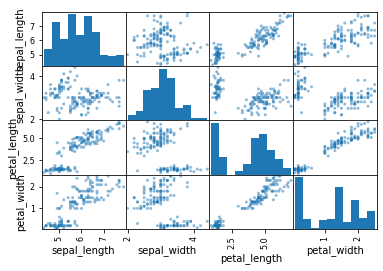

In [83]:
# Let us now visualize this correlation matrix in plots
scatter_matrix(df_iris)
plt.show()

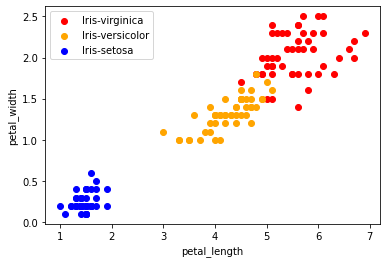

In [84]:
# Let us have a graphic look at both the Petal width and length
# We can already notice a very specific pattern in Petal dimensions for our 3 strains
# with Iris Setosa clearly clustered on the bottom left corner
strain = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']
colors = ['red', 'orange', 'blue']

for i in range(3):
    x = df_iris[df_iris['strain'] == strain[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=strain[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

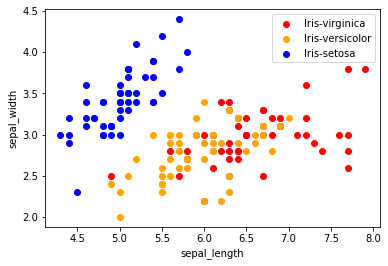

In [85]:
# Same now but with both Sepal width and length
strain = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']
colors = ['red', 'orange', 'blue']

for i in range(3):
    x = df_iris[df_iris['strain'] == strain[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=strain[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()

# Data preprocessing and label encoding

In [86]:
# As we will be using sklearn library, all data needs to be numerical, i.e integer or float
df1 = df_iris.replace('Iris-setosa', 0)
df1 = df1.replace('Iris-versicolor', 1)
df1 = df1.replace('Iris-virginica', 2)


In [33]:
# As sklearn does not work on pandas dataframe, let us convert df into numpy array
Iris_array = df1.to_numpy()

In [34]:
# Let us set y equal to our target column : the type of Iris strain
y = Iris_array[:,4]
y = y.astype(int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
# And X equal to the data that will be fed in the algorithm
X = np.delete(Iris_array, 4, 1)

# Setting up the model

### Splitting

* We will now attempt to split the dataset in 2 different parts so that the data used for testing the model will not have been used to train the model.
* The method used is the train_test_split from sklearn library. (Aurélien Geron, 2019)

### Training

* Then we will pass data to the algorithm (in this case LR algorithm). 

In [36]:
# Let us now divide the dataset in 70/30 proportions
# We also set our target as integers for less problems with libraries
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [40]:
# We set our Logistic Regression
LR_Model = LogisticRegression(max_iter=1000)
LR_Model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [41]:
# Get Accuracy of the test model
print(LR_Model.score(X_test, y_test) *100)

95.55555555555556


In [72]:
# Let us input new data points to see which type of Iris it is
print(LR_Model.predict(np.array([[4.3, 2.5, 3.5, 2.4]]))[0])
print(LR_Model.predict(np.array([[3.9, 4.5, 2.7, 2.4]]))[0])
print(LR_Model.predict(np.array([[4.3, 3.5, 4.1, 2.4]]))[0])

1
0
2


# Decision boundary

### Train set

* Error appears when trying to run the plot_decision_regions script as maximum number of training features to run this script should be 2. 

* Therefore, we could be looking to remove features from our dataset, such as the features with high correlation (i.e petal length and petal width, as shown before) because we don't need 2 features with a correlation coefficient value near 1.

* But here we will try to apply Principal Component Analysis to reduce our number of features to 2 whilst keeping the data that is the most relevant to the LR model. 


In [21]:
# Let us set the resulting pca array equal to 2, and feed it with our training data
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(n_components=2)

In [22]:
# Let us create a pca transformed training data
X_train2 = pca.fit_transform(X_train)

In [23]:
LR_Model.fit(X_train2, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

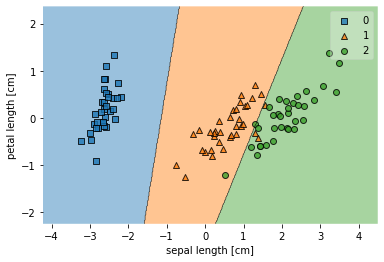

In [24]:
plot_decision_regions(X_train2, y_train, clf=LR_Model)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

# Decision boundary

### Test set

In [25]:
# Let us set the resulting pca array equal to 2, and feed it with our training data
pca_test = PCA(n_components=2)
pca.fit(X_test)

PCA(n_components=2)

In [26]:
# Let us create a pca transformed training data
X_test2 = pca.fit_transform(X_test)

In [27]:
LR_Model.fit(X_test2, y_test)

LogisticRegression(max_iter=1000, multi_class='multinomial')

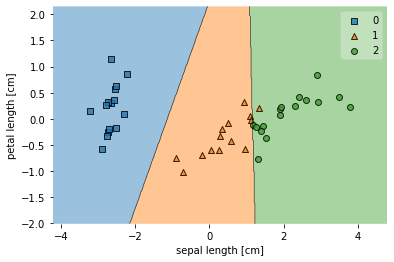

In [28]:
plot_decision_regions(X_test2, y_test, clf=LR_Model)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()